In [ ]:
'''

NAME : DHRUV DESAI
COLLEGE :CHAROTAR UNIVERSITY OF TECHNOLOGY(CSPIT)
BRANCH : COMPUTER ENGINEERING
YEAR : SECOND

'''


In [ ]:
#url of dataset-https://www.kaggle.com/gregorut/videogamesales
# EDA (EXPLORATORY DATA ANALYSIS)
# DATASET OF VIDEO GAME SALES
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

df = pd.read_csv("/content/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
missing_val_count_by_column = (df.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column > 0]

Year         271
Publisher     58
dtype: int64

In [ ]:
# dropping null values if exist
df.dropna(subset=["Publisher"], inplace=True) 

In [ ]:
# Fill missing cells with column median
df["Year"].fillna((df["Year"].median()), inplace=True)

In [ ]:
#Statistical Analysis
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,16540.0,8294.197642,4790.703200,1.00,4143.75,8292.50,12440.25,16600.00
Year,16540.0,2006.414510,5.788794,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16540.0,0.265079,0.817929,0.00,0.00,0.08,0.24,41.49
EU_Sales,16540.0,0.146883,0.506129,0.00,0.00,0.02,0.11,29.02
JP_Sales,16540.0,0.077998,0.309800,0.00,0.00,0.00,0.04,10.22
Other_Sales,16540.0,0.048191,0.188879,0.00,0.00,0.01,0.04,10.57
Global_Sales,16540.0,0.538426,1.557424,0.01,0.06,0.17,0.48,82.74


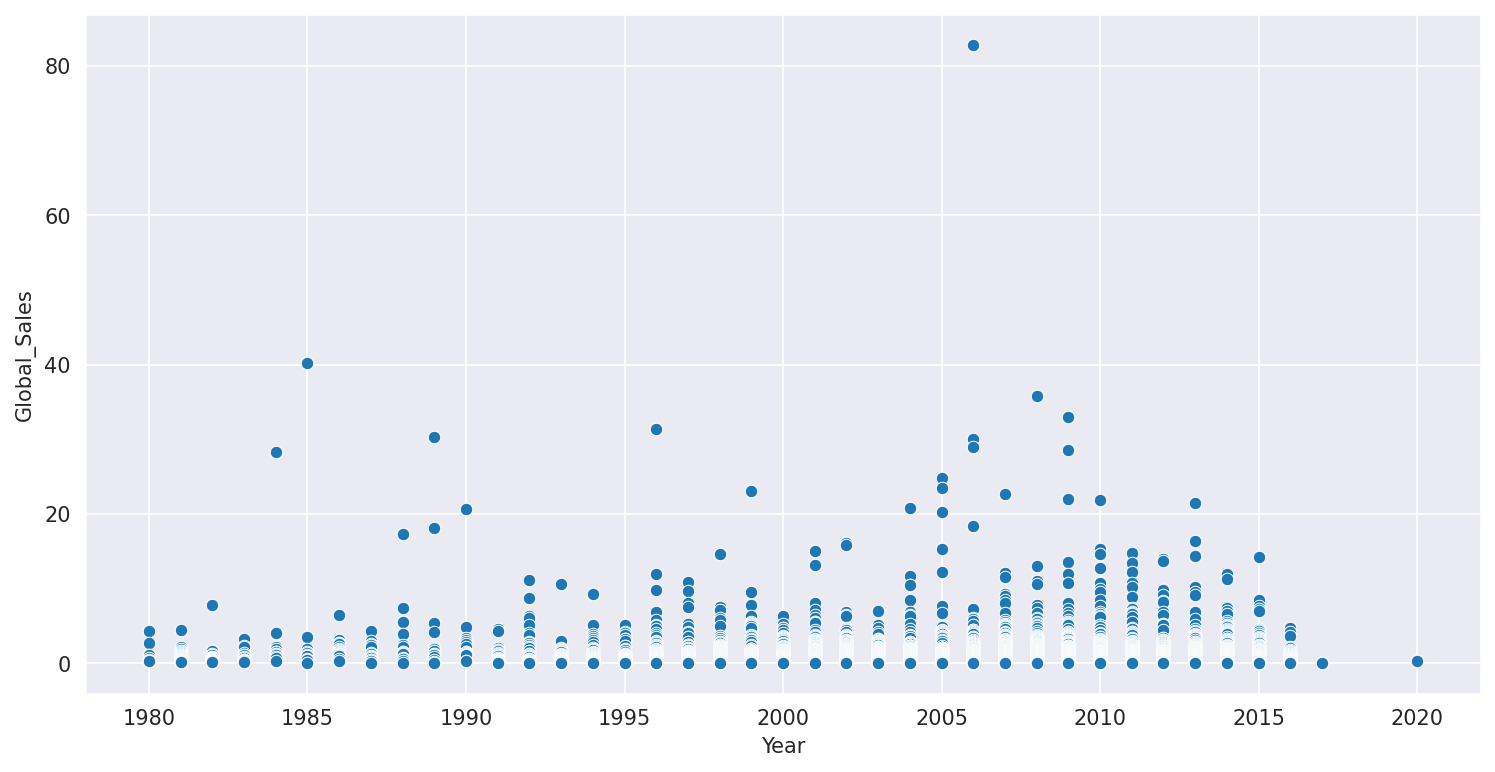

In [ ]:
#Exploring the relationship between Year and Global Sales
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(data=df, x="Year", y="Global_Sales")
plt.show()

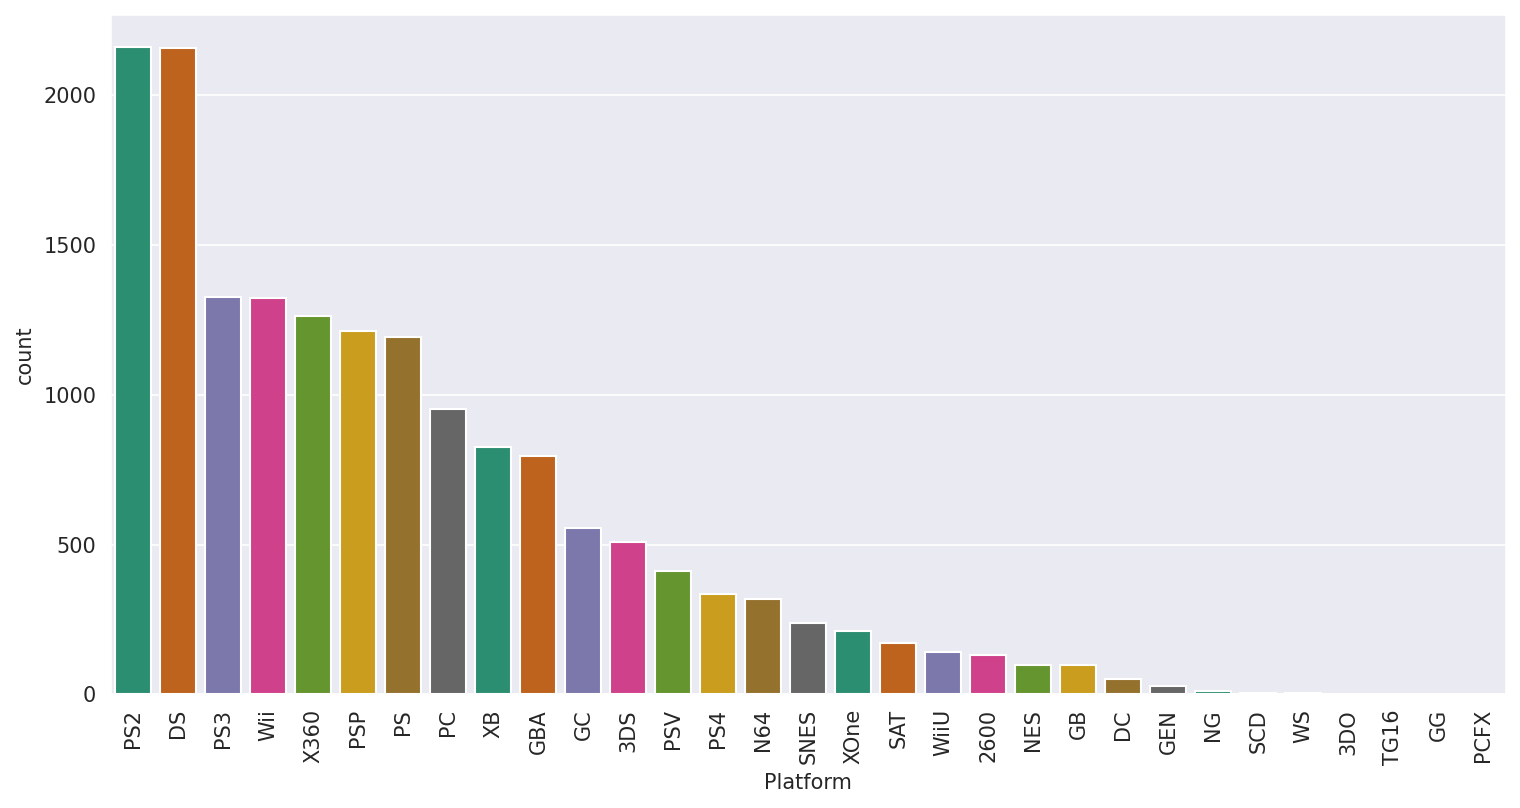

In [ ]:
#Total Count of Games for each Platform
plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=df,
              x="Platform",
              order = df["Platform"].value_counts().index,
              palette="Dark2")
plt.xticks(rotation=90)
plt.show()

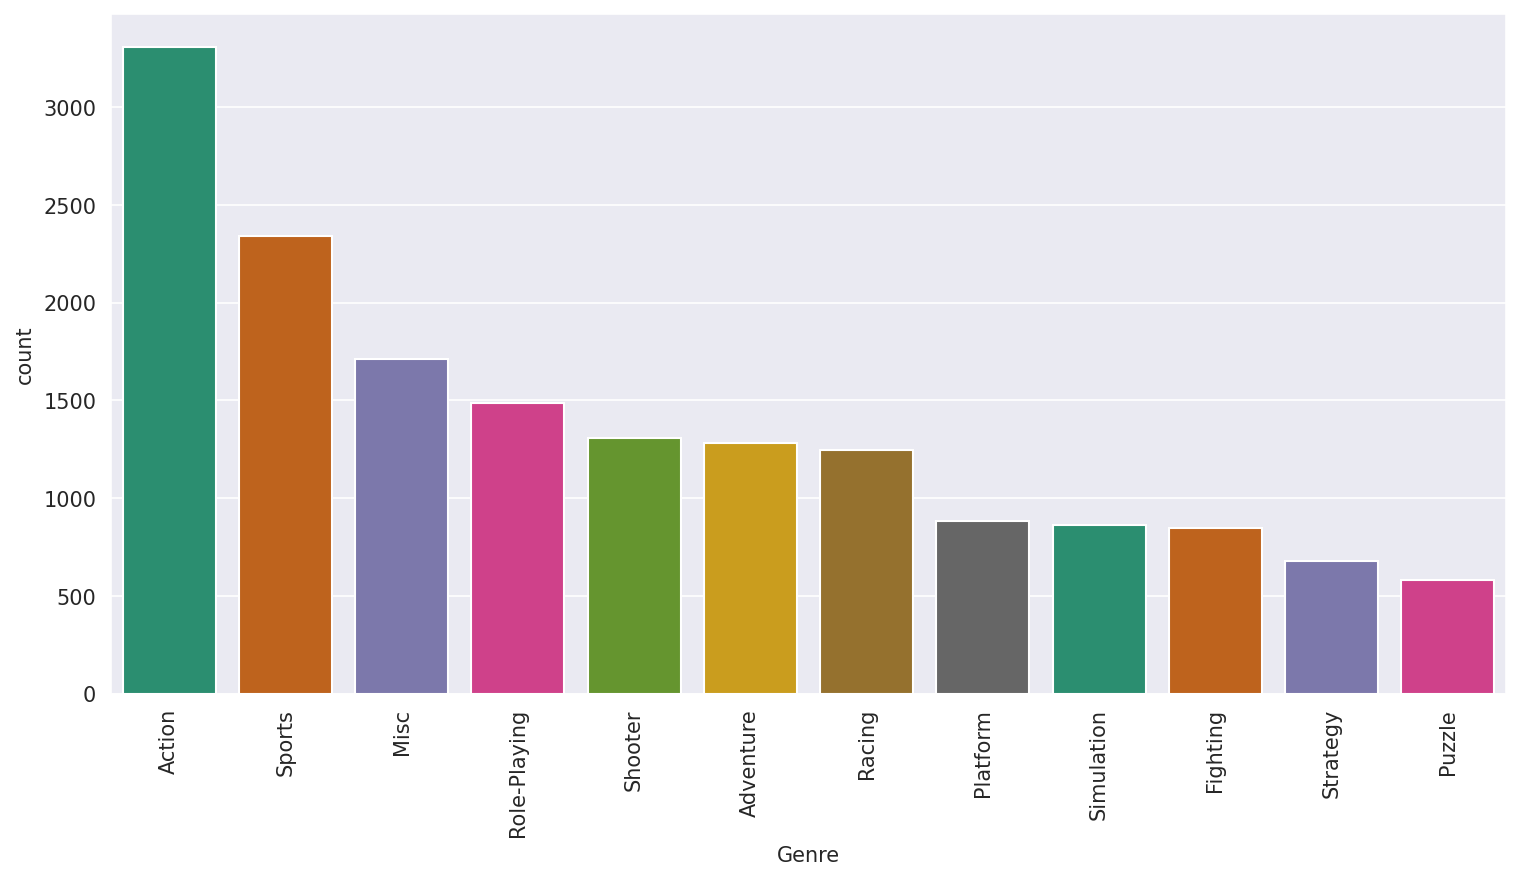

In [ ]:
#Total Count of Games for each Genre
plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=df,
              x="Genre",
              order = df["Genre"].value_counts().index,
              palette="Dark2")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Using the 'nlargest()' method, we can easily extract the top n values of a dataframe
df.nlargest(10, "Global_Sales")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
# Which game made the most sales per region and globally?
print(f"NA: {df.nlargest(1, 'NA_Sales').values[0,1]}")
print(f"EU: {df.nlargest(1, 'EU_Sales').values[0,1]}")
print(f"JP: {df.nlargest(1, 'JP_Sales').values[0,1]}")
print(f"Other: {df.nlargest(1, 'Other_Sales').values[0,1]}")
print(f"Global: {df.nlargest(1, 'Global_Sales').values[0,1]}")

NA: Wii Sports
EU: Wii Sports
JP: Pokemon Red/Pokemon Blue
Other: Grand Theft Auto: San Andreas
Global: Wii Sports


In [ ]:
#Which Publishers made the most sales?
sales_publisher = df.groupby("Publisher").agg({"Global_Sales": pd.Series.sum})
sales_publisher.nlargest(5, "Global_Sales")

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
